<a href="https://colab.research.google.com/github/inesmnif/inesmnif.github.io/blob/main/Grip_JUNE23_TASK_2_predict_the_optimum_number_of_clusters_and_represent_it_visually_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn import datasets
import seaborn as sns

In [ ]:
#uploading data
frame=pd.read_csv('Iris.csv')

In [ ]:
#observing the first five rows
frame.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
frame.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
frame.shape

(150, 6)

In [ ]:
#Check for duplicate values
print('No. of duplicated values :', frame.duplicated().sum())

No. of duplicated values : 0


In [ ]:
frame

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
frame.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

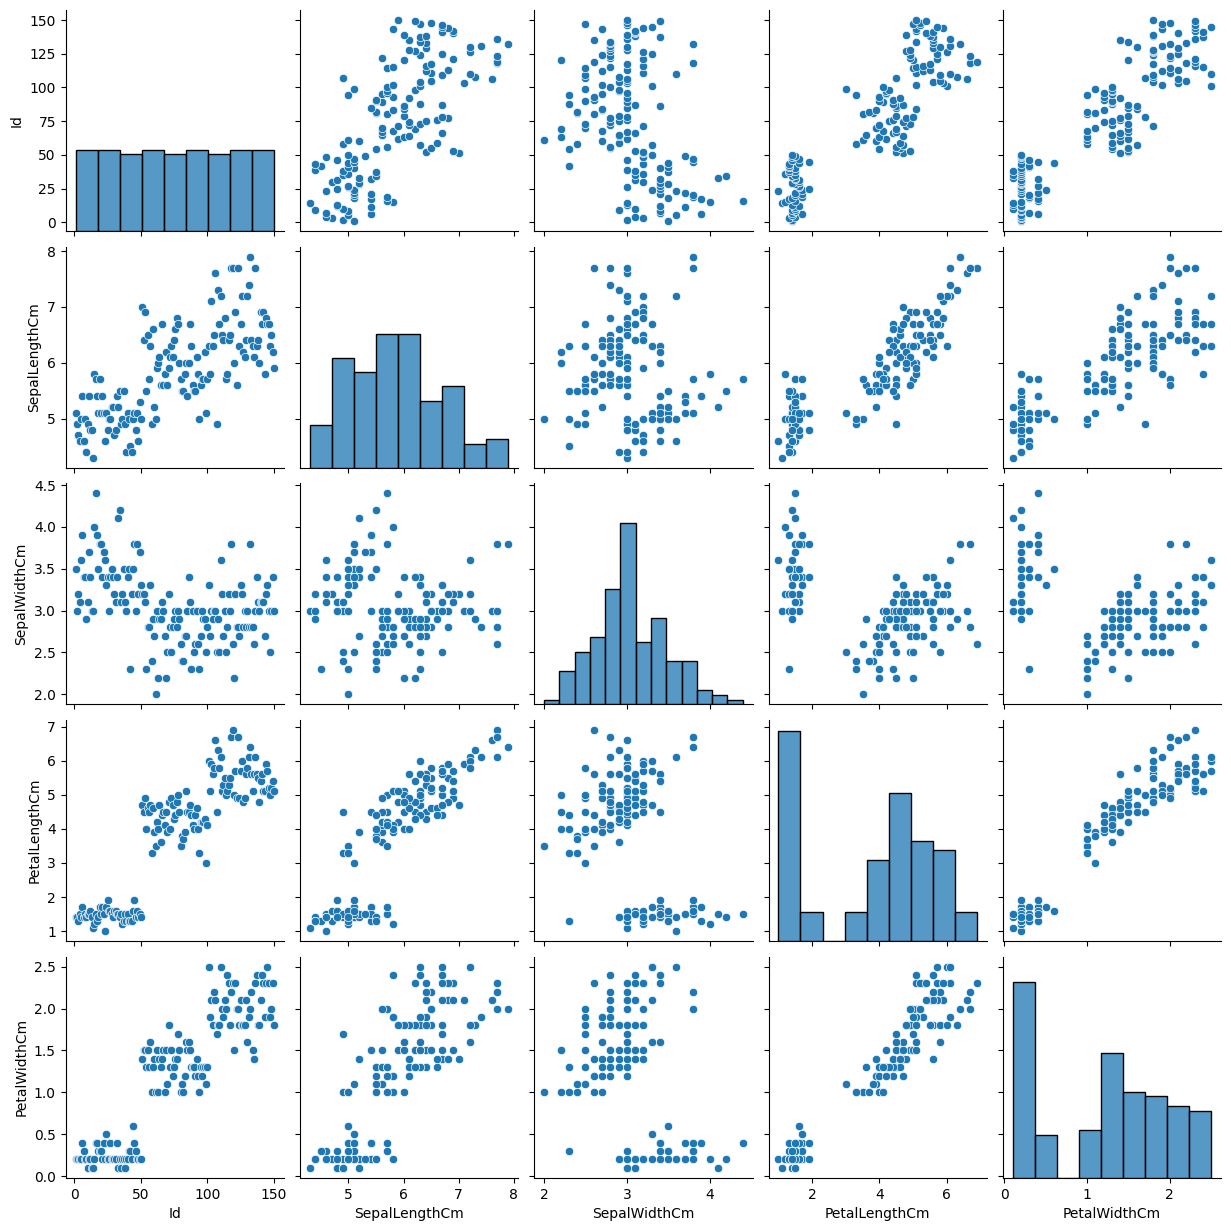

In [ ]:
sns.pairplot(frame)

<ipython-input-22-e80911520c52>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = frame.corr()


<Axes: >

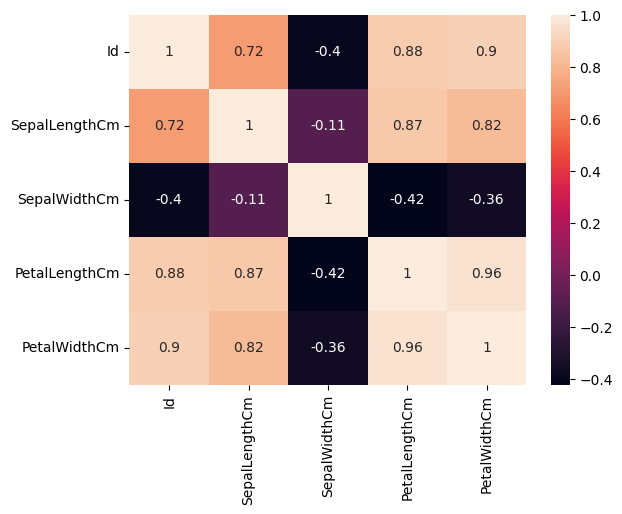

In [ ]:
corr = frame.corr()
sns.heatmap(corr,annot=True)

In [ ]:
#Calculating the sum of squares in-cluster
within_cluster_sum_of_squares = []

cluster_range = range(1,15)
for k in cluster_range:
    km = KMeans(n_clusters=k)
    km = km.fit(frame.iloc[:,[0,1,2,3]])
    within_cluster_sum_of_squares.append(km.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<ipython-input-24-b86e9c94365f>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(cluster_range,within_cluster_sum_of_squares,'ro--',color='red')


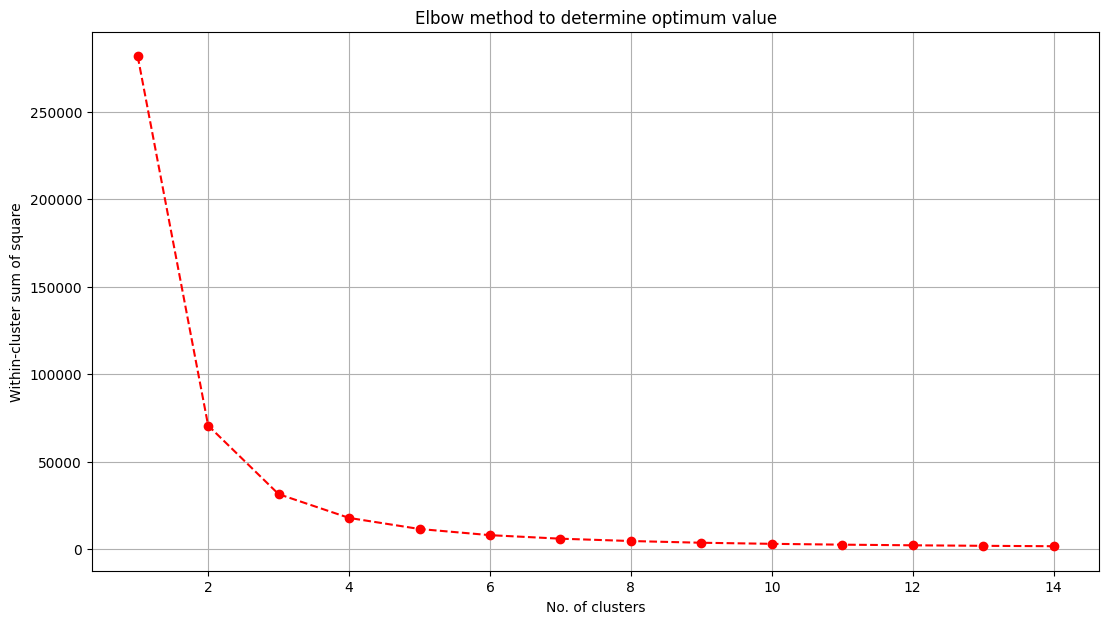

In [ ]:
#Plotting the cluster range
plt.figure(figsize=(13,7))
plt.plot(cluster_range,within_cluster_sum_of_squares,'ro--',color='red')
plt.title('Elbow method to determine optimum value')
plt.xlabel('No. of clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()
plt.show()

In [ ]:
model = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
prediction = model.fit_predict(frame.iloc[:,[0,1,2,3]])

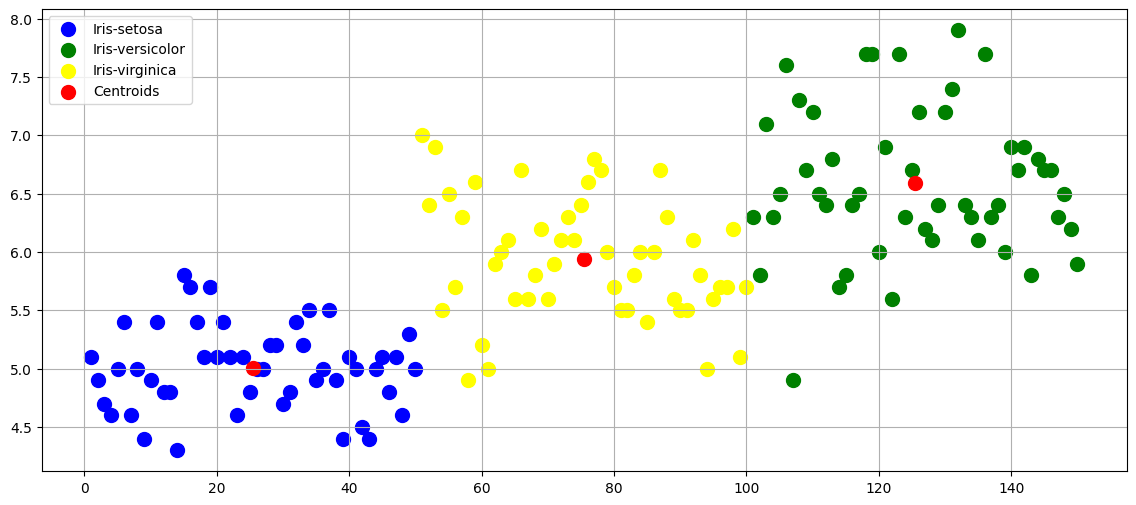

In [ ]:
#Visualize
plt.figure(figsize=(14,6))
val = frame.iloc[:,[0,1,2,3]].values
plt.scatter(val[prediction == 0,0],val[prediction == 0,1],s=100,c='blue',label='Iris-setosa')
plt.scatter(val[prediction == 1,0],val[prediction == 1,1],s=100,c='green',label='Iris-versicolor')
plt.scatter(val[prediction == 2,0],val[prediction == 2,1],s=100,c='yellow',label='Iris-virginica')

#Plot cluster centers
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=100,c='red',label='Centroids')
plt.grid()
plt.legend()